1.	Download two CSV files and place them in the `data` folder of your local Data Question 1 repository:
    
    a.	Gross Domestic Product (GDP) per capita: 
[http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD)

    * **DO NOT APPLY ANY FILTERS**
    * rename the file to gdp_per_capita.csv
    * open it with a text editor (not Excel) and take a look
    
    b.	Percentage of Individuals using the Internet: 
[http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H](http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H)
    * **DO NOT APPLY ANY FILTERS**
    * rename the file to internet_use.csv
    * open it with a text editor (not Excel) and take a look

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd` 
    
    `import numpy as np` 
    
    `import matplotlib.pyplot as plt` 
    
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.
    
4.	At the bottom of your imports cell, use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

5.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
# There are footnotes below row 6729
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', nrows = 6729)

Here is an alternative approach - read in the whole file and then remove the bad rows at the bottom.  
One downside to the approach is that the datatypes will likely all be read in as objects instead of numeric.

In [3]:
#gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

## Remove the two rows of footnotes
#gdp_df = gdp_df[:-2]

Another way - use skipfooter.  

This approach does give a scary looking warning about switching the engine to 'python', which can be ignored.

In [4]:
#gdp_df = pd.read_csv('../data/gdp_per_capita.csv' , skipfooter=2)

In [5]:
# Check to make sure that all rows got read in
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [6]:
gdp_df = (gdp_df
          .drop(columns = 'Value Footnotes')
          .rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
         )

gdp_df.shape

(6729, 3)

When dropping the Value Footnotes, you can also specify the axis as 1:

In [7]:
# gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

You can also use del to drop a column:

In [8]:
# del gdp_df['Value Footnotes']

You can also rename the columns by directly assigning them.

One potential downside of this approach is that you have to make sure that you are listing all columns in exactly the correct location, but for a small number of columns like we have here, it works.

In [9]:
# gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

You may have found the `inplace` argument for things like `.rename` or `.drop`. It is advised that you do not use this argument and there have been rumors that it will be deprecated in a future pandas release.

In [10]:
#gdp_df.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)

In [11]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


For some people, Year was not an int, but there are a couple of ways to switch types:

In [12]:
# gdp_df['Year'] = pd.to_numeric(gdp_df['Year'])
# dgp_df['Year'] = gdp_df['Year'].astype(int)

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [13]:
gdp_df['Year'].nunique()

29

There are 29 unique years.

In [14]:
gdp_df.groupby('Year')['Year'].count()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

In [15]:
gdp_df.groupby('Year')['Year'].count().sort_values()

Year
1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
2018    226
1997    226
1998    227
1999    228
2000    236
2001    237
2006    238
2005    238
2004    238
2003    238
2002    238
2007    239
2016    239
2017    239
2014    240
2015    240
2008    240
2009    241
2010    241
2012    241
2013    241
2011    243
Name: Year, dtype: int64

The number of observations per year range from 210 to 243.

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [16]:
gdp_df.groupby('Country')['Country'].count().sort_values().head(10)

Country
Djibouti                      1
South Sudan                   8
Turks and Caicos Islands      8
Sint Maarten (Dutch part)     9
Nauru                        12
Afghanistan                  17
SÃ£o TomÃ© and Principe      18
Liberia                      19
CuraÃ§ao                     19
Timor-Leste                  19
Name: Country, dtype: int64

Note from Tony: Countries with less governance, changes in governance, newly founded, or general transparency.

Thanks to Lexa: Another way: use .size() instead of .count().

In [17]:
gdp_df.groupby(['Country']).size()

Country
Afghanistan            17
Albania                29
Algeria                29
Angola                 29
Antigua and Barbuda    29
                       ..
West Bank and Gaza     25
World                  29
Yemen                  29
Zambia                 29
Zimbabwe               29
Length: 243, dtype: int64

10. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

11. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

In [18]:
gdp_2014 = gdp_df[gdp_df.Year == 2014]
gdp_2014['GDP_Per_Capita'].describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

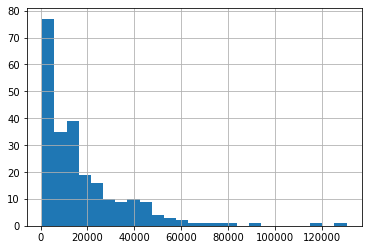

In [19]:
gdp_2014['GDP_Per_Capita'].hist(bins = 25);

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [20]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329


In [21]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804


Can also use `.sort_values`.

In [22]:
# lowest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).head(5))
# highest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).tail(5))

                       Country  Year  GDP_Per_Capita
1014  Central African Republic  2014      672.681648
794                    Burundi  2014      768.469837
1375           Dem. Rep. Congo  2014      784.872656
4414                     Niger  2014      900.136918
3697                    Malawi  2014     1142.530804
               Country  Year  GDP_Per_Capita
707             Brunei  2014    76448.593329
5316         Singapore  2014    81965.361071
3610        Luxembourg  2014    92349.186429
5003             Qatar  2014   116693.507701
3639  Macao SAR, China  2014   130439.106674


14. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

15. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [23]:
gdp_pivoted = (gdp_df[gdp_df.Year.isin([1990, 2017])]
               .pivot_table(values = 'GDP_Per_Capita', columns = 'Year', index = 'Country')
               .dropna()
              )

gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [24]:
# Alt: gdp_pivoted = gdp_df.pivot_table(
#    values = 'GDP_Per_Capita', # values to aggregate
#    index = 'Country', # column to group_by and display in pivot_table rows
#    columns = ['Year'], # column to group_by and display in pivot_table columns
# ).dropna(subset = [1990, 2017]) # Drop any rows were there is a NaN

# Only selecting 1990 and 2017 and dropping NaN
# gdp_pivoted = gdp_pivoted[[1990, 2017]]
# gdp_pivoted


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [25]:
(gdp_pivoted['Percent_Change'] < 0).sum()

20

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

In [26]:
gdp_pivoted.sort_values('Percent_Change', ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [27]:
top_2_gdp_change = gdp_pivoted.nlargest(n = 2, columns = 'Percent_Change').index

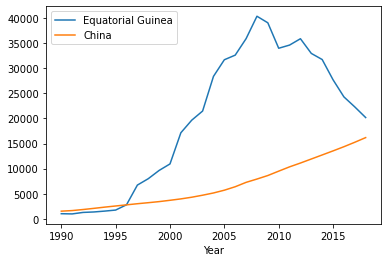

In [28]:
fig, ax = plt.subplots()
for country in top_2_gdp_change:
    gdp_df[gdp_df.Country == country].plot(x = 'Year', y = 'GDP_Per_Capita', label = country, ax = ax);

Alternatively, from Lexa, filtering and assigning the first plot as ax.

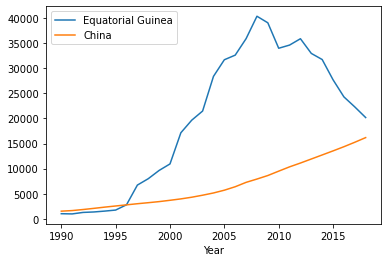

In [29]:
Equatorial_Guinea = gdp_df[gdp_df['Country']=='Equatorial Guinea']

China_gdp = gdp_df[gdp_df['Country']=='China']

ax = Equatorial_Guinea.plot(x='Year',y='GDP_Per_Capita',label='Equatorial Guinea')
China_gdp.plot(ax=ax,x='Year',y='GDP_Per_Capita',label='China');

Stan used seaborn to get two plots on the same axis.

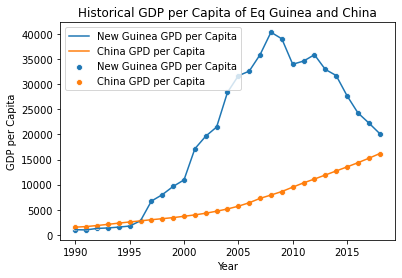

In [70]:
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']
gdp_df_china = gdp_df[gdp_df['Country']=='China']

sns.scatterplot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'],label="New Guinea GPD per Capita")
sns.scatterplot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'],label="China GPD per Capita")
# adding connecting lines
sns.lineplot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'],label="New Guinea GPD per Capita")
sns.lineplot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'],label="China GPD per Capita")
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Historical GDP per Capita of Eq Guinea and China')
plt.legend();

Matt had another take:

In [31]:
gdp_lineplot = gdp_df.pivot_table(values="GDP_Per_Capita", index="Country", columns="Year")
gdp_lineplot

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1502.354073,1671.581238,1626.764793,1772.764974,1807.762344,1795.735834,1766.593077,1757.023490,1758.465636,1734.723214
Albania,4458.247115,3229.250120,3015.391377,3323.864388,3622.007101,4129.975340,4533.894357,4064.132804,4450.922523,5056.566515,...,9525.377979,9927.638204,10207.752347,10369.561032,10492.669028,10700.993216,10970.321401,11352.101422,11796.719185,12316.071501
Algeria,10300.015042,9929.097717,9873.024864,9453.323181,9176.235569,9344.748909,9558.822868,9509.123393,9845.209222,10017.374034,...,12697.690780,12919.491054,13046.128511,13229.008711,13329.770758,13557.769757,13774.758920,13926.910489,13822.389087,13737.356063
Angola,4761.229638,4651.204299,4238.318419,3118.903488,3060.336207,3407.974524,3747.164004,3892.473420,3945.594930,3902.774196,...,6292.534856,6360.441938,6346.395122,6645.085625,6730.945822,6813.052106,6644.857255,6258.376628,6044.972035,5725.327238
Antigua and Barbuda,17454.549799,17598.378401,17497.380127,18055.500956,18851.937822,17645.173769,18407.710553,19000.281878,19486.171892,19816.291441,...,22568.626530,20555.414205,19876.215323,20283.897534,19918.131682,20440.540555,20994.725890,21923.796037,22400.379562,23840.729896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,3236.196368,3314.761163,3208.119899,3517.569954,3920.320010,4137.843864,...,3816.165070,4019.485067,4405.778573,4568.509070,4559.032259,4445.307470,4493.612080,4600.685400,4651.723645,4576.432497
World,8966.014072,8942.915645,8959.240204,8984.696890,9109.764275,9271.364990,9489.446042,9725.189314,9831.530107,10041.606392,...,12726.100963,13226.953625,13592.336383,13880.359252,14187.709075,14514.392218,14828.598884,15142.226499,15527.280228,15914.172172
Yemen,3425.707169,3466.039074,3561.740073,3519.550101,3581.814359,3628.620445,3660.350262,3729.732721,3839.688064,3873.781695,...,4359.812628,4566.157400,3876.302619,3861.116716,3938.891066,3828.484887,3108.764217,2619.050681,2404.422370,2284.970504


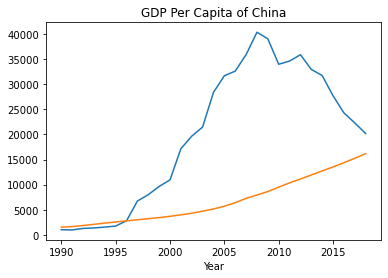

In [68]:
gdp_lineplot.loc['Equatorial Guinea'].plot(y='value', title='GDP Per Capita of Equatorial Guinea')
gdp_lineplot.loc['China'].plot(y='value', title='GDP Per Capita of China');

Armelle, using groupby to create the plot.

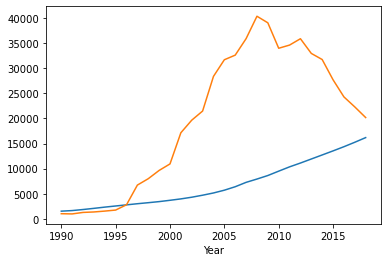

In [33]:
gdp_df_large = gdp_df.loc[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])]
fig, ax =plt.subplots()
gdp_df_large.groupby('Country').plot(x='Year', y='GDP_Per_Capita', ax=ax, legend=False);

From Jason, iterating through the groupby object.

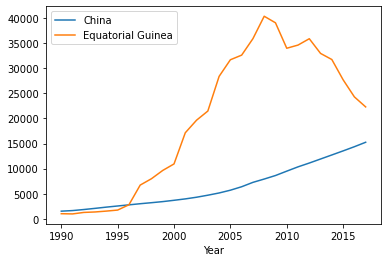

In [34]:
fig, ax = plt.subplots()

for key, grp in gdp_df[(gdp_df['Country'].isin(['Equatorial Guinea','China'])) & (gdp_df['Year'].between(1990,2017, inclusive=True))].sort_values(['Country','Year']).groupby('Country'):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='GDP_Per_Capita', label=key)

plt.legend(loc='best')
plt.show();

18. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [35]:
continents = pd.read_csv('../data/continents.csv')

gdp_df = pd.merge(left = gdp_df, right = continents)

20. Determine the number of countries per continent. Create a bar chart showing this.

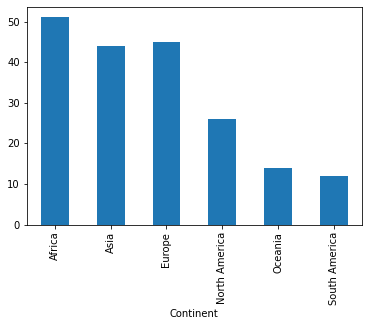

In [36]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar');

21. Creat a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

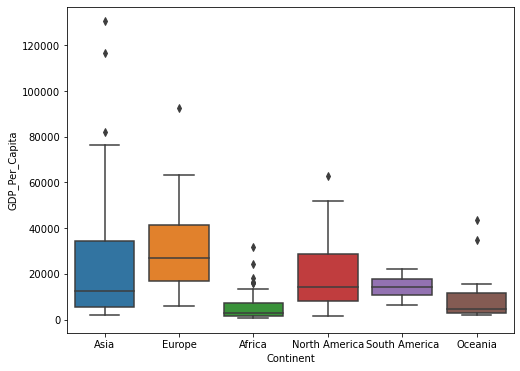

In [37]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = gdp_df[gdp_df.Year == 2014], x = 'Continent', y = 'GDP_Per_Capita');

22. Read in internet_use.csv into a DataFrame called `internet_df`. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your `read_csv()` call to fix this. Again, **do not** modify the original datasets. 

In [38]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)

Another approach: use skiprows.

In [39]:
# internet_df = pd.read_csv('../data/internet_use.csv', skiprows=list(range(4497,4688)))

In [40]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the `Internet_Users_Pct` column is a numeric data type and fix it if it is not.

In [41]:
internet_df = (internet_df
               .drop(columns = 'Value Footnotes')
               .rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
              )

In [42]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [43]:
internet_df[internet_df.Internet_Users_Pct > 0]['Year'].min()

1990

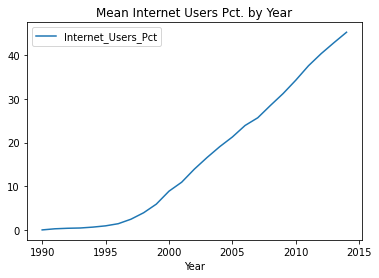

In [44]:
internet_df[internet_df.Year >= 1990].groupby('Year').mean().plot()
plt.title('Mean Internet Users Pct. by Year');

From Savannah, a bar chart.

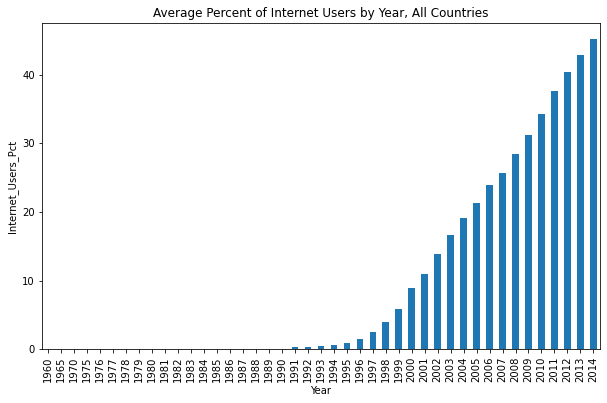

In [45]:
#Plotting the Internet Use Percent by Year
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind = 'bar', figsize=(10,6))
plt.title('Average Percent of Internet Users by Year, All Countries')
plt.ylabel('Internet_Users_Pct');

From Veronica, a box plot.

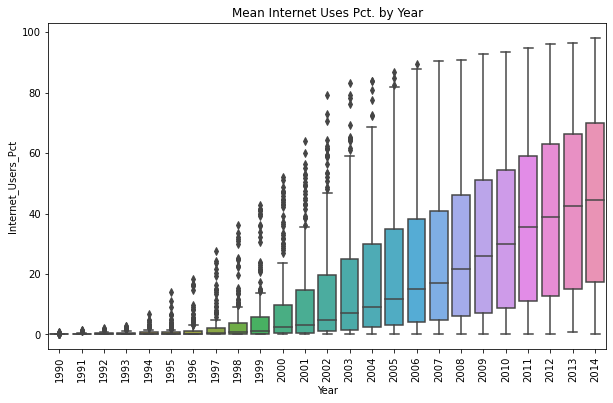

In [46]:
plt.figure(figsize = (10,6))
sns.boxplot(data = internet_df[internet_df.Year >= 1990], x = 'Year', y = 'Internet_Users_Pct')
plt.title('Mean Internet Uses Pct. by Year')
plt.xticks(rotation = 90);

Good note by Vernoica:

Note: I think that the boxplot is a useful visualization because it illustrates the median % of Internet Users per Country, the IQR of Internet Users per Country, and it makes it easy to pick out the outliers (especially for the late 1990s / early 2000s). It does not show the global median number of Internet Users because it is a visualization of a rate, not of raw numbers, and bigger countries like the US are weighed the same as smaller countries like San Marino.

Another take by Matthew: a seaborn lineplot which adds uncertainty band.

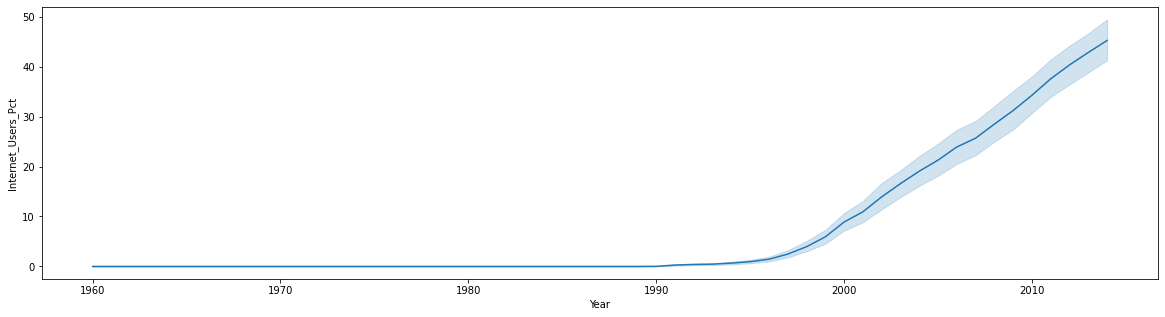

In [47]:
plt.figure(figsize=(20,5))
sns.lineplot(data= internet_df,x =internet_df["Year"],y=internet_df["Internet_Users_Pct"]);

26. Merge `gdp_df` and `internet_df` (on Country and Year) into a single DataFrame named `gdp_and_internet_use`. Keep only countries and years that appear in both tables.  
**Difficult Bonus:** Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

27.	Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [48]:
gdp_and_internet_use = pd.merge(left = gdp_df, right = internet_df)

In [49]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [50]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


Savannah took a crack at the difficult bonus. Alvin did a similar approach.

In [51]:
#set(internet_df['Country']).difference(gdp_df['Country'])

In [52]:
#set(gdp_df['Country']).difference(internet_df['Country'])

In [53]:
# #Creating a dictionary of misnamed countries that have a match
# Country_Misnames = {
#     'Brunei':'Brunei Darussalam',
#     'Central African Republic':'Central African Rep.',
#     'Dem. Rep. Congo':'Congo (Democratic Republic of the)',
#     'Korea':'Korea (Rep. of)',
#     'Dominican Republic':'Dominican Rep.',
#     'Hong Kong SAR, China':'Hong Kong, China',
#     'Iran':'Iran (Islamic Rep. of)',
#     'Kyrgyz Republic':'Kyrgystan',
#     'Lao PDR':'Lao P.D.R.',
#     'Macao SAR, China':'Macao, China',
#     'Micronesia':'Micronesia (Fed. States of)',
#     'St. Kitts and Nevis':'Saint Kitts and Nevis',
#     'St. Lucia':'Saint Lucia',
#     'The Gambia':'Gambia',
#     'West Bank and Gaza':'Palestine',
#     'Vietnam':'Viet Nam'
# }

# internet_df['Country'] = internet_df['Country'].replace(Country_Misnames)

28. Create a new DataFrame, named `gdp_and_internet_use_2014` by extracting data for the year 2014 from `gdp_and_internet_use`. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [54]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]

In [55]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.673536463414635

In [56]:
(gdp_and_internet_use_2014.Internet_Users_Pct >= 90).sum()

12

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country.  What trends do you notice?

In [57]:
top_3_gdp = gdp_and_internet_use_2014.nlargest(3, 'GDP_Per_Capita').Country.values

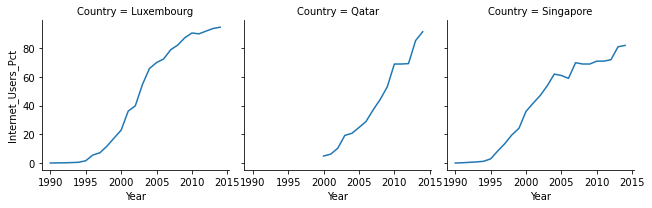

In [58]:
fg = sns.FacetGrid(data = gdp_and_internet_use[gdp_and_internet_use.Country.isin(top_3_gdp)], col = 'Country')
fg.map(plt.plot, 'Year', 'Internet_Users_Pct');

From Jason, using a bar chart.

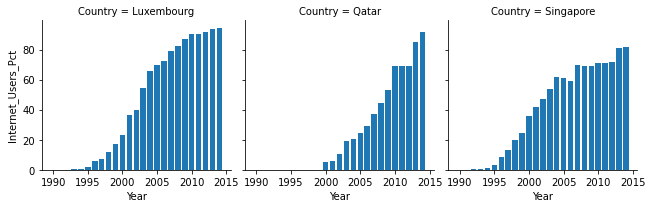

In [59]:
top_3_gdp_2014 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)[:3]['Country'].to_list()

top_3_gdp_2014_internet_use = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3_gdp_2014)].sort_values(['Country', 'Year'])

fg = sns.FacetGrid(top_3_gdp_2014_internet_use, col="Country", )
fg.map(plt.bar, "Year", "Internet_Users_Pct").add_legend();

Can also filter on multiple conditions using a pipe.

In [60]:
# top_3 = internet_df[
#     (internet_df['Country']=='Qatar') |
#     (internet_df['Country']=='Luxembourg') |
#     (internet_df['Country']=='Singapore')
# ]

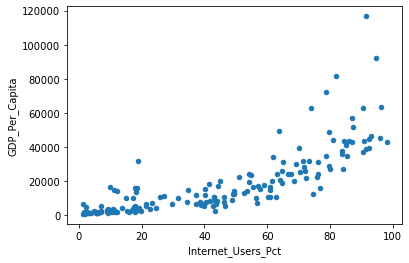

In [61]:
gdp_and_internet_use_2014.plot(kind = 'scatter', x = 'Internet_Users_Pct', y = 'GDP_Per_Capita');

From Daniel, a version showing continent information.

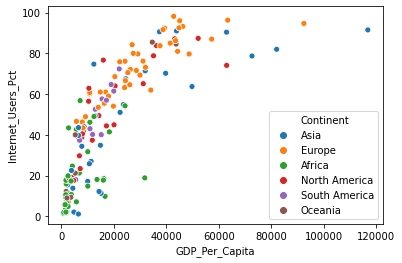

In [62]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="Internet_Users_Pct", hue="Continent");

Good comment by Matt: 
At low GDP per capita levels, any raise in GDP causes a large increase in internet users. Once GDP per capita hits about $20,000, most countries have at leat 50% internet users, and the slope begins to slow down.

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [63]:
gdp_and_internet_use_2014[['Internet_Users_Pct',  'GDP_Per_Capita']].corr()

,Internet_Users_Pct,GDP_Per_Capita
Internet_Users_Pct,1.000000,0.787989
GDP_Per_Capita,0.787989,1.000000


32. Add a column to `gdp_and_internet_use_2014` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [71]:
gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)
# gdp_and_internet_use_2014 = gdp_and_internet_use_2014.assign('log_gdp_per_capita' = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log))

<ipython-input-71-0b4227f69c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['Log_GDP_Per_Capita'] = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)


TypeError: assign() takes 1 positional argument but 2 were given

In [65]:
gdp_and_internet_use_2014[['Internet_Users_Pct',  'Log_GDP_Per_Capita']].corr()

,Internet_Users_Pct,Log_GDP_Per_Capita
Internet_Users_Pct,1.000000,0.884432
Log_GDP_Per_Capita,0.884432,1.000000


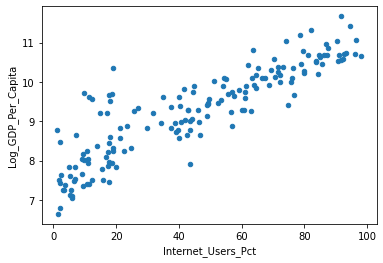

In [66]:
gdp_and_internet_use_2014.plot(kind='scatter', x="Internet_Users_Pct", y='Log_GDP_Per_Capita');

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [67]:
gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States'][['Internet_Users_Pct',  'GDP_Per_Capita']].corr()

,Internet_Users_Pct,GDP_Per_Capita
Internet_Users_Pct,1.000000,0.991618
GDP_Per_Capita,0.991618,1.000000


From Kedir:
This is totally expected result as both internet use and percapita income increased over past decades. 